## Class 5: Decision Tree Classification

---

### This notebook is adapted from the course ML for Physics and Astronomy

### by Viviana Acquaviva

A useful repository :
https://github.com/jakevdp/PythonDataScienceHandbook

The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).

and take inspiration from:
http://scikit-learn.org/stable/auto_examples/index.html
___

# 1. $\underline{{\rm Classification\ datasets}}$

As we learned yesterday, ML problems that predict a diescrete class is called a classification problem. The data sets for a classification problem may be tabular (made of a table of features) or may be images. We will start with tabular data.

## 1.1 As always we start with data exploration and visualization

Scikit-learn comes with modules of learning sets. We are going to import a data set designed for the classification of a type of flower, the Iris.

In [ ]:
### Let's do our imports
import numpy as np
import matplotlib.pyplot as plt
### here's our classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn import metrics
### and here's the sklearn pre-made datasets, of which the iris set is only one of many
from sklearn import datasets

The [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), was famously analyzed by Ronald Fisher in 1936.

More details on the different datasets can be found [here](http://scikit-learn.org/stable/datasets/index.html#datasets).

And some detail about this particular data set is here:

http://archive.ics.uci.edu/ml/datasets/Iris

Let's load it.

In [ ]:
#create a variable to store the iris dataset
iris = datasets.load_iris()

In [ ]:
# check out the data type of this object
type(iris)

This data set is similar to a dictionary object that holds all the data and some metadata about the data set. But its is a 'bunch' object.

We can see what 'keys' are in the dictionary like so:

In [ ]:
# we can call the .keys() function on the variable that holds the data dictionary
### LET's DESCRIBE THE OUTPUT
iris.keys()

We see from the above cell, that the data set contains many different keys.

The features are in the key called 'data',
And we can clearly see other keys that we will need for our classification problem:
'target', 'target_names' and 'feature names'.

Let's explore this information.

In [ ]:
# let's create a varaible to hold all of our training features
### LET'S DESCRIBE THE SYNTAX
features = iris.data

# and of course, we need it's shape
features.shape

Each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as *samples*, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as *features*, and the number of columns as ``n_features``.

what are the value of n_samples and n_features?

In [ ]:
# let's get the feature names
iris.feature_names

Our iris fetaures are aranged in columns:

- first column, sepal length in cm
- second column, sepal width in cm
- third column, petal length in cm
- fourth column, petal width in cm     

Here's a diagram of an iris to understand what these fetaures are.

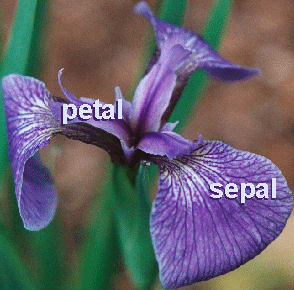

In [ ]:
# create an array to hold the target variable
target = iris.target
target.shape

In [ ]:
# in what form is the target variable?
# let's look at it
target

Ok, the targets are either  '0,1, or 2'

In [ ]:
# And we see that target_names is a key in this object, so let's get the target names
iris.target_names

The target values represent:

- Iris Setosa (0)
- Iris Versicolour (1)
- Iris Virginica (2)

### Ok let's visualize already!

We have four features, which means our data space has four dimensions, plus the target. This makes it a bit difficult to visualize all of it.

In general, we should at least:

1. check that all the features are in a similar numerical range (and if not, normalize them!),

2. check whether the data set is very imbalanced (e.g. one or more classes are much more common than others)

3. check if lots of data are missing.


In [ ]:
#Let's take a look at histograms of the features
### Now that we're plotting several sets, it's useful to plot with a loop!

### LET'S DESCRIBE THE SYNTAX
for i in range(features.shape[1]):
    plt.hist(features[:,i],alpha=0.3,histtype='stepfilled',label = iris.feature_names[i])
    plt.xlabel('cm');
    plt.legend()
 ### WHAT SHOULD WE LABEL THE x-axis???

What challenges might we foresee based on the distribution of these features?

In [ ]:
#in the case we have more than a few possible targets, we can use np.unique() to
#determine how many possible unique target values there are in a data set
np.unique(target)

Ok, so as we already established, we're looking for three possible tragets, let's see how they're distributed in the dataset

In [ ]:
#Let's take a look at the histogram of the possible classes
plt.hist(target);

What's going on here? What do we think about the distribution of our target?

## 1.2 Building the Decision Tree

It's now time for us to build our first, very simple, classifier.

The binary splitting makes this extremely efficient. <b> In a well-constructed tree, each question will cut the number of options by approximately half, </b> very quickly narrowing the options even among a large number of classes.

<b> The trick, of course, comes in deciding which questions to ask at each step. </b>

In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, <b> each node in the tree splits the data into two groups using a cutoff value within one of the features. </b>
Let's now look at an example of this.

We begin by doing the train/test split on the data:

In [ ]:
#We don't need to reshape our features here because they are already a 2D matrix
X_train, X_test, y_train, y_test = train_test_split(features, target, \
                                                test_size = 0.20, \
                                                random_state=5)

In [ ]:
#Let's look at at the distribution of our targets
#these are discrete variables so we're just making sure that each class is included
#more or less evenly after the random split
plt.hist(y_train, alpha=0.5, label = 'train')
plt.hist(y_test, alpha=0.5, label = 'test')
plt.legend

In [ ]:
## I'm going to define a function that returns our cross-validation scores
## because we're doing classification, I want to use "accuracy" as our first metric

def cross_val_classification(model, ftr, tgt, cv, score_metric='accuracy'):
    scores = cross_validate(model, ftr, tgt, cv=cv, scoring = score_metric, \
                        return_train_score = True)
    test = scores['test_score']
    train = scores['train_score']

    print('Mean test scores:', test.mean(), '+/-', test.std())
    print('Mean train scores:', train.mean(), '+/-', train.std())
    return test, train

# $\underline{{\rm Exercise A.}}$
### Run the Decision Tree ML model on the Iris data!
i. Create a varable to hold the model, you will use the DecisionTreeClassifier() as your model

ii. fit the model to the training data

iii. create an array called ypred to hold the model predictions, use function .predict()

iv. pass your predicted values (y_pred) and your test set target values (y_test) to metrics.accuracy_score() and get the accuracy score.

v. create a 5 k-fold cross-validation generator to pass to the cross_val_accuracy function

vi. do the cross-validation and compare to your first accuracy score

Is anything surprising about these scores?

# 2 $\underline{{\rm Interpretation\ tools}}$
The Decision Tree Classifier comes with great built-in functions for understanding the output.

## 2.1 Visualizing the Tree

The sklearn package comes with a module for visualizing the tree itself!

In [ ]:
from sklearn import tree

In [ ]:
#We plot the tree like so:
### LET'S DESCRIBE THE OUTPUT TOGETHER
plt.figure(figsize=(20,20))  # customize this size according to the size of your tree

tree.plot_tree(model_1, feature_names = iris.feature_names, \
               class_names = iris.target_names, filled=True, node_ids=True);

## 2.2 The confusion matrix
As discussed, the confusion gives us another representation of the performance of the classifier. We can determine if there are any "problematic" features, features for which the model performed particularly worse.

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_1, X_test, y_test, display_labels
=iris.target_names, cmap='Blues')

What conculsion can we make of this?

Let's get some other metrics, such as the precision and recall and f1 score (for multi-class classification).

In [ ]:
metrics.precision_score(y_test,y_pred, average='macro')

In [ ]:
metrics.recall_score(y_test,y_pred, average='micro')

In [ ]:
metrics.f1_score(y_test,y_pred, average='macro')

## 2.3 The learning curve
Sometimes it's iseful to evaluate whether a model is in need of more data.
We can utilize the built-in function leraning curve for this. As we discussed, the learning curve can also tell us if our model is overfitting or underfitting.

In [ ]:
from sklearn.model_selection import LearningCurveDisplay

In [ ]:
common_params = {
    "X": features,
    "y": target,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": cv,
    "score_type": "both",
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

In [ ]:
#### REPLACE "model" with YOUR model from Exercise A!!!
LearningCurveDisplay.from_estimator(model, **common_params)

Do you think our model suffers from high variance or high bias? Do you think it needs more data??

# 3. $\underline{\rm Classification\ with\ images}$

Now we are going to repeat all of these steps, but for the sklearn digits dataset, which are images! Let's look at them!

In [ ]:
digits = datasets.load_digits()

In [ ]:
#Let's see what keys are stored in the bunch
digits.keys()

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(6, 6), tight_layout=True)
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')

In [ ]:
ftrs_digits = digits.data

In [ ]:
ftrs_digits.shape

In [ ]:
ftrs_digits[0]

# $\underline{{\rm Exercise\ B.}}$

Repeat all of ML classification steps for the sklearn digits dataset.

You will want to repeat all of the steps:
- exploring and visualizing the data
- looking at its distribution
- peforming the train test split
- defining and fitting a model
- evaluating the model and comparing to cross-validtaion results
- visualizing the results and interpreting
### If the decision tree chart is too big use the max_depth keyword to limit how many branches are shown!